## HW4 Skeleton code

% import necessary modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt

% Q1 setup

In [82]:
import scipy.stats 
import numpy.random as rn

In [5]:
rn.seed(0)

% Q1a

In [6]:
m = 10**5;  # number of coins
N = 16; # number of tosses each coin

Generate headCounts and plot histogram in the cell below

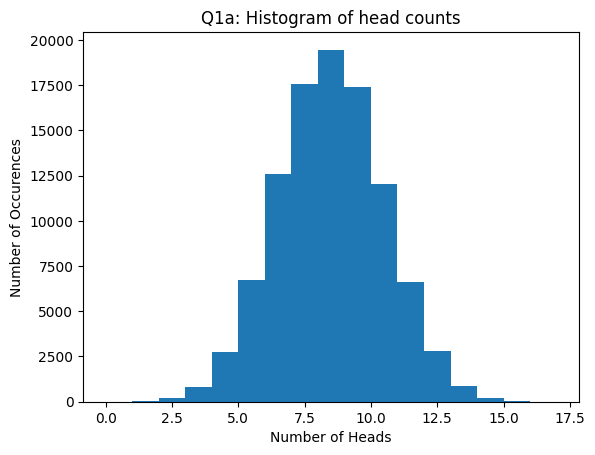

In [7]:
simulations = rn.random(size = (m,N))
headCounts =  np.sum(simulations<.5,1)

plt.hist(headCounts, bins = range(18))
plt.xlabel("Number of Heads")
plt.ylabel("Number of Occurences")
plt.title('Q1a: Histogram of head counts')
plt.show()

% Q1b

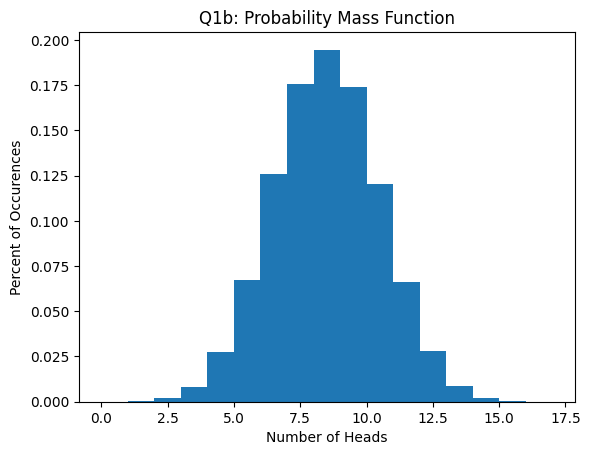

In [8]:
PMF,_,_ = plt.hist(headCounts, bins=range(18), density=True)
plt.xlabel("Number of Heads")
plt.ylabel("Percent of Occurences")
plt.title('Q1b: Probability Mass Function')
plt.show()

% Q1c

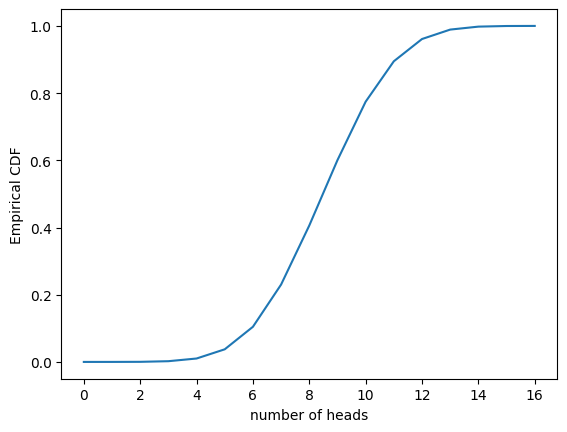

In [9]:
CDF = []

for k in range(17):
    CDF.append(sum(PMF[0:k]))
plt.plot(range(17),CDF)
plt.xlabel('number of heads')
plt.ylabel('Empirical CDF')

plt.show()

% Q1d

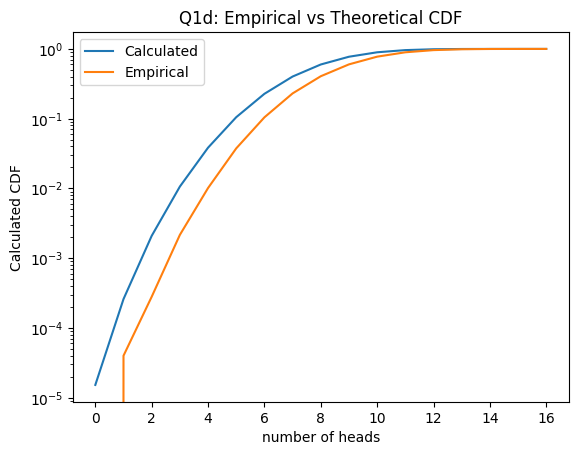

In [10]:
from scipy.stats import binom
cdf_calculated = []
for k in range(17):
    cdf_calculated.append(binom.cdf(k, 16, 0.5))

plt.plot(range(17),cdf_calculated)
plt.plot(range(17),CDF)
plt.legend(['Calculated', 'Empirical'])
plt.yscale('log')
plt.xlabel('number of heads')
plt.ylabel('Calculated CDF')

plt.title('Q1d: Empirical vs Theoretical CDF')
plt.show()

% Q2 (2e,2f optional)

2a, simulate fair coin and collect headCountsFair

In [13]:
simulations = rn.random(size = (1000,10))
headCountsFair =  np.sum(simulations<.5,1)


2b, simulate loadd coin and collect headCountsLoaded

In [14]:
simulations = rn.random(size = (1000,10))
headCountsLoaded =  np.sum(simulations<.6,1)

2c, plot both headCounts on the same figure

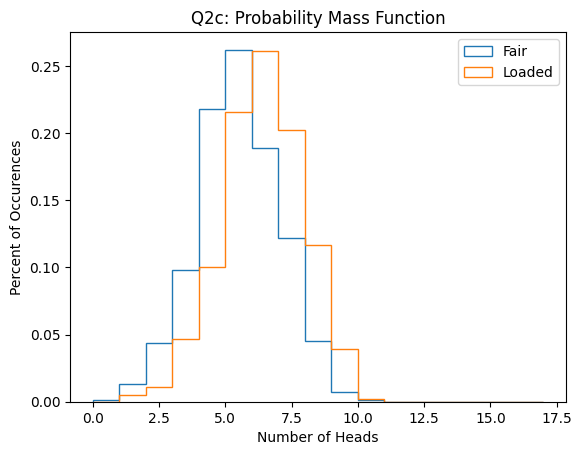

In [15]:
plt.hist(headCountsFair, bins=range(18), density=True,histtype='step')
plt.hist(headCountsLoaded, bins=range(18), density=True,histtype='step')
plt.xlabel("Number of Heads")
plt.ylabel("Percent of Occurences")
plt.title('Q2c: Probability Mass Function')
plt.legend(['Fair', 'Loaded'])
plt.show()

2d, perform ttest and print out p-value; also print out a statement about whether or not there is statistically significant difference between the two sets of coins

In [16]:
var = stats.ttest_ind(headCountsLoaded,headCountsFair)
print("There is a difference since the p-value is extremely small")
print(var[1])

There is a difference since the p-value is extremely small
1.4881150189373157e-39


% Q2e (Write a for loop to) repeat Q2a, Q2b and Q2d (with only 10 fair coins and 10 loaded coins) 10 times and count the number of times that you got a p-value <= 0.05

In [17]:
count = 0

for i in range(10):
    simulations = rn.random(size = (10,10))
    headCountsFair =  np.sum(simulations<.5,1)

    simulations = rn.random(size = (10,10))
    headCountsLoaded =  np.sum(simulations<.6,1)

    var = stats.ttest_ind(headCountsLoaded,headCountsFair)

    if var[1] <= 0.05:
        count +=1


print(count)

0


% Q2f (Write a for loop to) repeat Q2a, Q2b and Q2d 1000 times, but with two sets of coins that are all fair coins, and count number of times that you got a p-value <= 0.05

In [18]:
count = 0

for i in range(1000):
    simulations = rn.random(size = (10,10))
    headCountsFair =  np.sum(simulations<.5,1)

    simulations = rn.random(size = (10,10))
    headCountsFair2 =  np.sum(simulations<.5,1)

    var = stats.ttest_ind(headCountsFair2,headCountsFair)

    if var[1] <= 0.05:
        count +=1


print(count)

44


% Q3 setup

In [19]:
import pandas as pd

In [20]:
url = 'https://raw.githubusercontent.com/jianhuaruan/3753/main/'
# uncomment below to run locally
# url = ''
data = pd.read_csv(url + 'brfss2.csv', index_col=0)
data = data.drop('wtkg2',axis=1).dropna(axis=0, how='any').values
data.shape

(385974, 5)

data is now a numpy array and the columns are age, current weight (kg), <br>
last year's weight (kg), height (cm), and gender (1: male; 2: female).

% Q3a: Display summary statistics of three selected columns

In [46]:

df = pd.DataFrame(data, columns = ['Age','Current_Weight','Old_Weight',"Height","Gender"])

stats = df.agg(
    {
        "Current_Weight":[min,max,np.mean,np.median,np.std],
        "Old_Weight":[min,max,np.mean,np.median,np.std],
        "Height" :[min,max,np.mean,np.median,np.std]
    
    }   
)

stats = stats.transpose()


stats["mean + std"] = stats["mean"] + stats["std"]
stats["mean - std"] = stats["mean"] - stats["std"]
stats = stats.drop(["std"], axis = 1)
stats = stats.transpose()

stats

,Current_Weight,Old_Weight,Height
min,20.000000,22.727273,61.000000
max,300.000000,342.272727,236.000000
mean,79.061463,79.805186,169.013441
median,77.272727,77.272727,168.000000
mean + std,98.575746,100.384058,179.402311
mean - std,59.547181,59.226315,158.624571


% Q3b: scatter plots and Pearson correlation coefficients

                Weight_Change  Current_Weight  Old_Weight       Age
Weight_Change        1.000000        0.034132   -0.319117 -0.068676
Current_Weight       0.034132        1.000000    0.936271 -0.082044
Old_Weight          -0.319117        0.936271    1.000000 -0.053661
Age                 -0.068676       -0.082044   -0.053661  1.000000
Old weight haas a discernible negative correlation with current weight


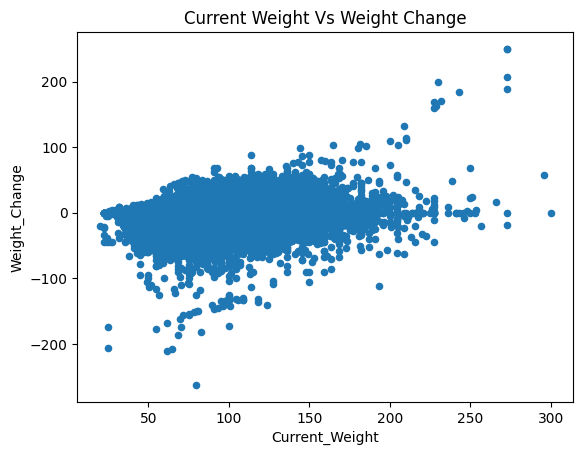

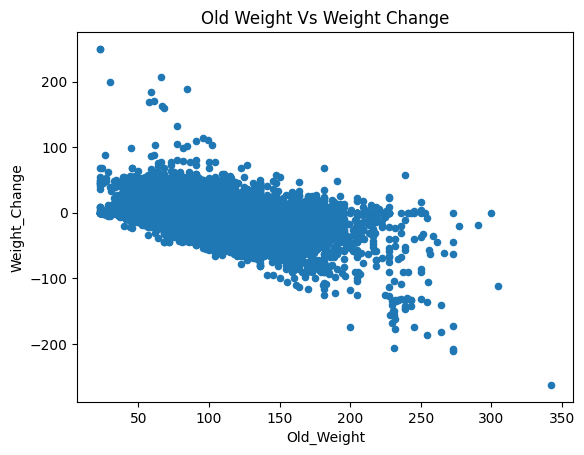

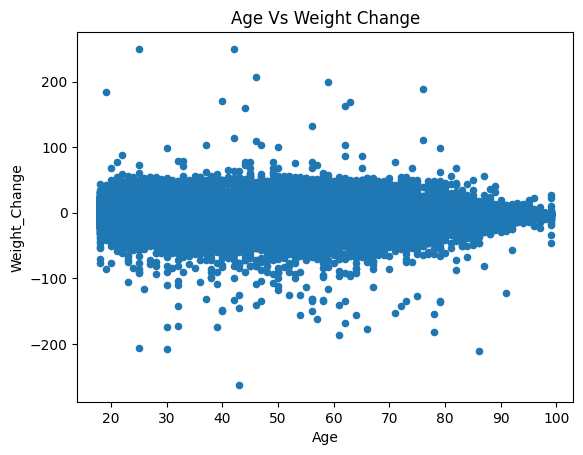

In [64]:
df["Weight_Change"] = df["Current_Weight"] - df["Old_Weight"]

corr_data = df[["Weight_Change","Current_Weight","Old_Weight","Age"]]
corr_results = corr_data.corr(method = "pearson")

print(corr_results)
df.plot(x ="Current_Weight" , y ="Weight_Change" ,kind = "scatter", title =  "Current Weight Vs Weight Change")
df.plot(x ="Old_Weight" , y ="Weight_Change" ,kind = "scatter", title =  "Old Weight Vs Weight Change")
df.plot(x ="Age" , y ="Weight_Change" ,kind = "scatter", title =  "Age Vs Weight Change")

print("Old weight haas a discernible negative correlation with current weight")

% Q3c: compare weight_change for men and women: mean, SEM, t-test

In [87]:
men = df[df["Gender"] == 1.0]
men_mean = men.Weight_Change.mean()
men_sem = men.Weight_Change.sem()


women = df[df["Gender"] == 2.0]
women_mean = women.Weight_Change.mean()
women_sem = women.Weight_Change.sem()

result = scipy.stats.ttest_ind(men.Weight_Change, women.Weight_Change)
print(result)
print("The p-value is less than 0.5 so there is sufficient evidence there is a difference in weight change between men and women")


Ttest_indResult(statistic=-7.701843115268439, pvalue=1.344337254704946e-14)
The p-value is less than 0.5 so there is sufficient evidence there is a difference in weight change between men and women


% Q3d: compare weight/height ratio for men and women: mean, SEM, t-test

In [94]:
df["Weight_Height_Ratio"] = df["Current_Weight"] / df["Height"]

men = df[df["Gender"] == 1.0]
men_mean_ratio = men.Weight_Height_Ratio.mean()
men_sem_ratio = men.Weight_Height_Ratio.sem()



women = df[df["Gender"] == 2.0]
women_mean_ratio = women.Weight_Height_Ratio.mean()
women_sem_ratio = women.Weight_Height_Ratio.sem()

result = scipy.stats.ttest_ind(men.Weight_Height_Ratio, women.Weight_Height_Ratio)

print(result)
print("There is not sufficient evidence to say there is a difference in ratio between men and women")

Ttest_indResult(statistic=164.6991226748384, pvalue=0.0)
There is not sufficient evidence to say there is a difference in ratio between men and women


% Q3e (bonus)